503
502
501
500


Text(0.5, 1.0, '$SPY Price Position over Time')

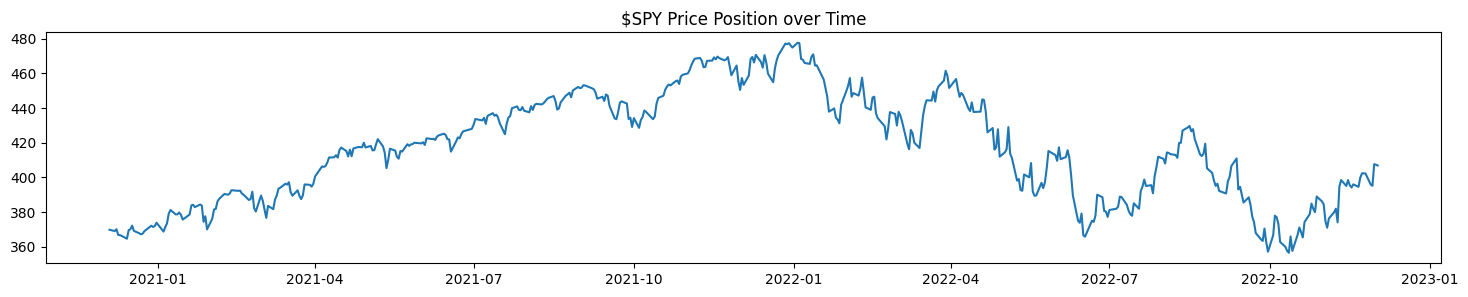

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ticker="SPY"

df = pd.read_csv(f"{ticker}HistoricalData.csv")
#print(df)

prices = np.array(df["c"])
print(prices.size)
#print(prices)

price_velocity = np.diff(prices)
print(price_velocity.size)
#print(price_velocity)

price_accel = np.diff(price_velocity)
print(price_accel.size)

price_jerk = np.diff(price_accel)
print(price_jerk.size)

plt.rcParams["figure.figsize"] = (18, 3)
timestamps = pd.to_datetime(df["day"])
plt.plot(timestamps, prices)
    
plt.title(f"${ticker} Price Position over Time")


Text(0.5, 1.0, '$SPY Price Velocity over Time')

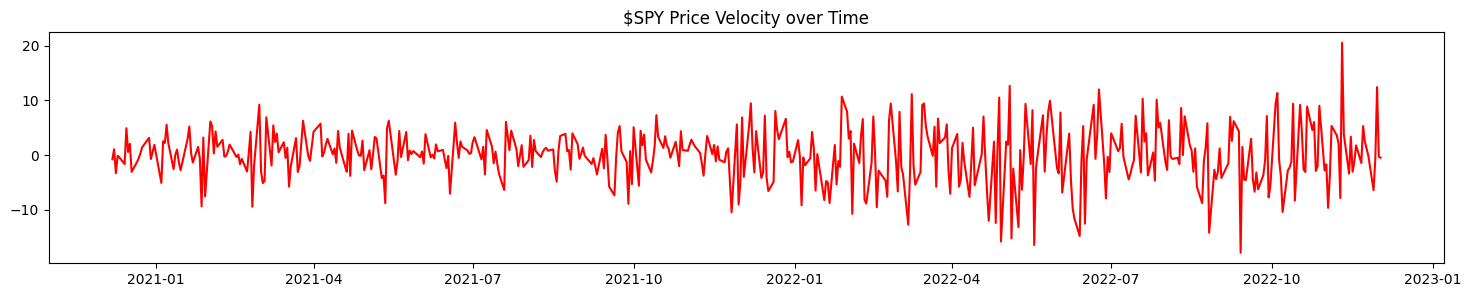

In [3]:
plt.plot(timestamps[1:], price_velocity, color="red")
plt.title(f"${ticker} Price Velocity over Time")

Text(0.5, 1.0, '$SPY Price Acceleration over Time')

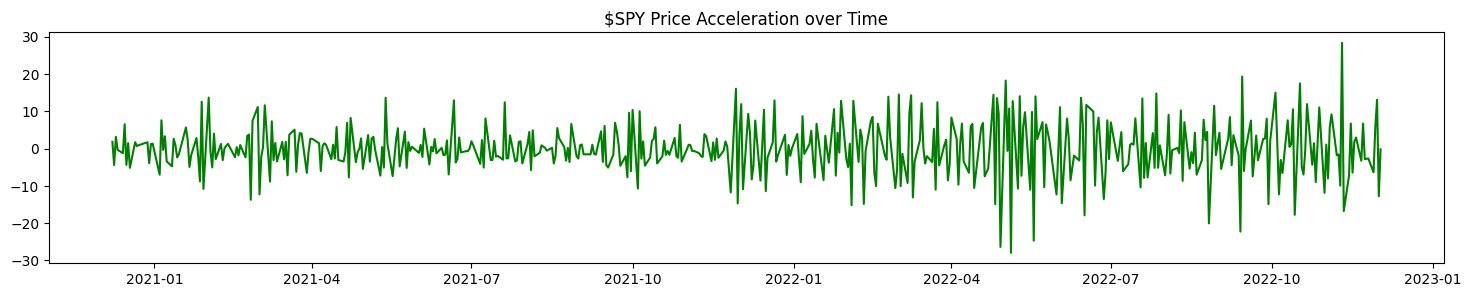

In [4]:
plt.plot(timestamps[2:], price_accel, color="green")
plt.title(f"${ticker} Price Acceleration over Time")

Text(0.5, 1.0, '$SPY Price Jerk over Time')

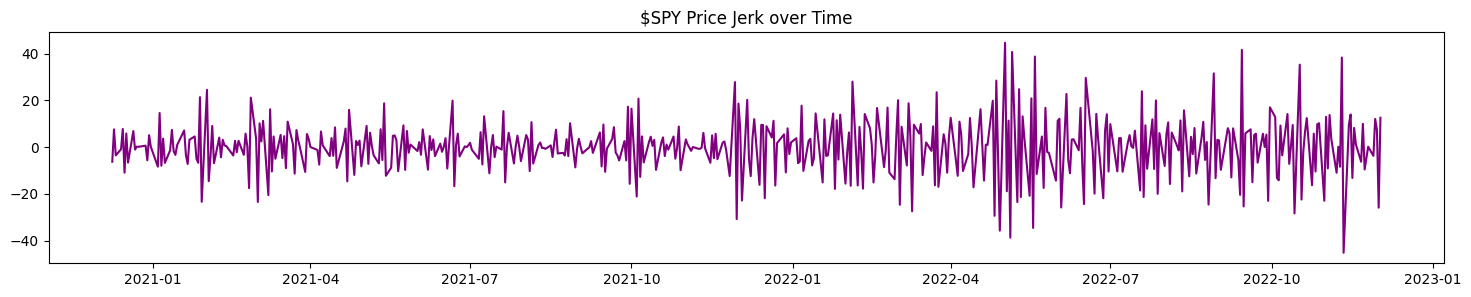

In [5]:
plt.plot(timestamps[3:], price_jerk, color="purple")
plt.title(f"${ticker} Price Jerk over Time")

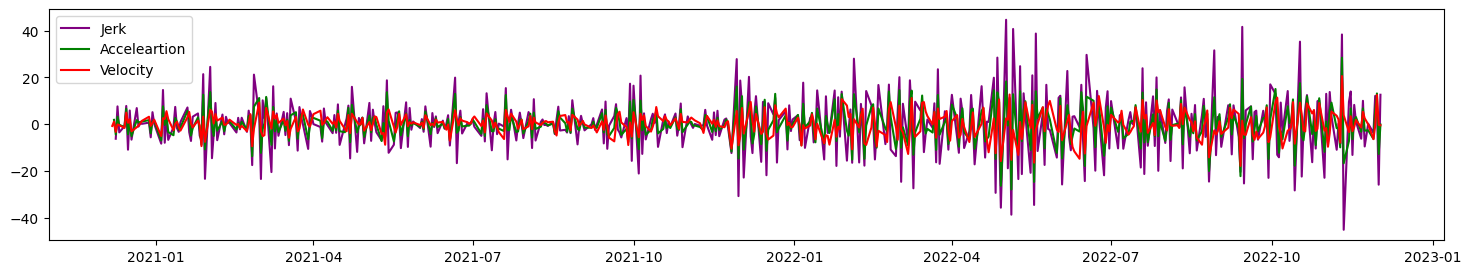

In [6]:
plt.plot(timestamps[3:], price_jerk, color="purple", label="Jerk")
plt.plot(timestamps[2:], price_accel, color="green", label = "Acceleartion")
plt.plot(timestamps[1:], price_velocity, color="red", label = "Velocity")
plt.legend()

# Theory
The blocks and code above jump into immediately analyzing the data for a certain stock. Lets take a step back and look at some of the methodology. 

We begin with the idea of a "jerk" equation: $J(x''', x'', x', x) = 0$. Expanding this from a parametric equation to a linear equation, we see: $Ax''' + Bx'' + Cx' + Dx + E = 0$, where $A, B, C, D, E \in \mathbb{R}$.

Recall from class, we now want to find a specific and general solution to $x(t)$. First, our "homegenous" case, when $E = 0$: 

we see the characteristic equation: $A\lambda^3 + B\lambda^2 + C\lambda + D = 0$ -- I don't think we use this here... but honestly unsure. 

Instead, we are doing a least squares regression model to get $A,B,C,D,E$. 

In [30]:

prices_t = prices[3:]
price_velocity_t = price_velocity[2:]
price_accel_t = price_accel[1:]

num_days_training = 200
training_matrix = np.matrix( [ price_jerk[:num_days_training], 
                              price_accel_t[:num_days_training], 
                              price_velocity_t[:num_days_training], 
                              prices_t[:num_days_training], 
                              np.ones(num_days_training) ] )

training_matrix = training_matrix.reshape(num_days_training, 5) 

soln_specificity = 1e-9


soln_vec = np.ones(num_days_training) * soln_specificity
#soln_vec = np.column_stack(soln_vec)

#print(soln_vec)
#print(soln_vec.shape)
ls_coeffs = np.linalg.lstsq(training_matrix, soln_vec, rcond=None)

A, B, C, D, E = ls_coeffs[0]

print(A,B,C,D,E)

def next_price(prior2, prior1, curr): 
    next_val = (-E + (A * prior2) - (prior1 * (3 * A + B)) - (curr * (-3*A-2*B-C+D)) ) / (A + B + C)
    return next_val


for idx in range(num_days_training, num_days_training+10):
    #print("Actual Price on Day ",idx,"is",prices_t[idx])
    p2 = prices_t[idx-2]
    p1 = prices_t[idx-1]
    p = prices_t[idx]
    #print("Predicted price for day",idx+1,"is",next_price(p2, p1, p))




2.2383065611714487e-11 1.1797702280374826e-11 1.321407364718701e-12 -1.814942308942195e-12 -3.114862288154779e-11


# Finite Differences and Taylor Series Approach
We see some difficulty in the above method in a lot of reliance on the black magic of a `np.linalg.lstsq()` regression -- and it removes us from differential equations. 

After a meeting with the course instructor, Dr. Drew Pasteur, we have made the realization that:

- Since we are going up to **jerk** as an input, our finite differences approximations of 1st, 2nd, and 3rd derivatives (for velocity, acceleration, jerk) should use the same number of discrete points. The specific derivation of this was quite difficult, the we arrived at the formulation of:

Let $p(x)$ be our function, s.t. $p(0)=p_0, p(i)=p_i, ...$
Then our finite difference formulation is as such:

$p'(x) = \frac{3p(x) - 4p(x - 1) + p(x - 2)}{2}$

$p''(x) = 2p(x) - 5p(x-1) + 4p(x-2) - p(x-3)$

$p'''(x) = p(x) - 3p(x-1) + 3p(x-2) - p(x-3)$

Then, with these found, we can look find $p(t + 1)$ through a taylor series expansion:
$p(t + 1) = p(t) + hp'(t) + \frac{h^2}{2!}p''(t) + \frac{h^3}{3!}p'''(t) + E$

In our case, $h = 1$, as our chosen time step is 1. 


Price on  3 is 366.85
Predicted Price for  4 is 354.9699999999999
Price on  3 is 366.73
Predicted Price for  4 is 374.8766666666668
Price on  3 is 366.3
Predicted Price for  4 is 363.21999999999997
Price on  3 is 364.66
Predicted Price for  4 is 361.21000000000015
Price on  3 is 369.59
Predicted Price for  4 is 386.2766666666665
Price on  3 is 370.17
Predicted Price for  4 is 359.1200000000003
Price on  3 is 372.24
Predicted Price for  4 is 379.69333333333316
Price on  3 is 369.18
Predicted Price for  4 is 356.5766666666666
Price on  3 is 367.86
Predicted Price for  4 is 372.8599999999999
Price on  3 is 367.24
Predicted Price for  4 is 366.6266666666666
Price on  3 is 367.57
Predicted Price for  4 is 369.01666666666665
Price on  3 is 369.0
Predicted Price for  4 is 371.63000000000005
Price on  3 is 372.17
Predicted Price for  4 is 377.5066666666668
Price on  3 is 371.46
Predicted Price for  4 is 363.12333333333305
Price on  3 is 371.99
Predicted Price for  4 is 377.1733333333335
Price 

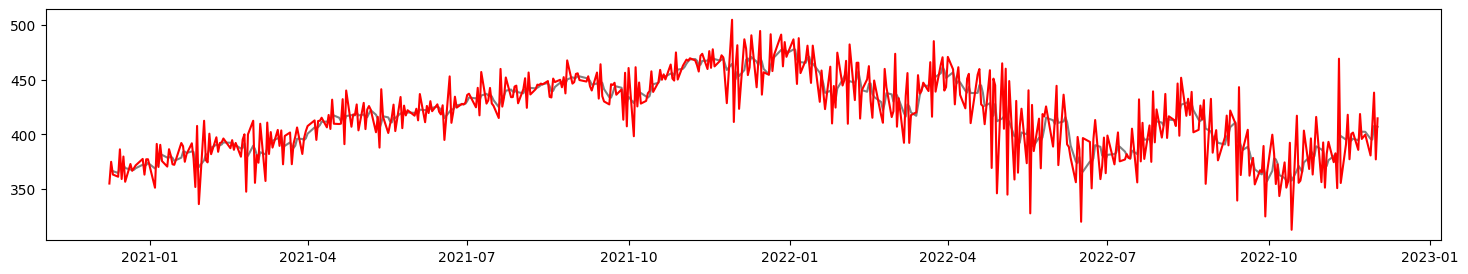

In [31]:
def calc_differences(price_points):
    soln = []
    for step in range(3, prices.size):
        xi, xi_1, xi_2, xi_3 = price_points[step], price_points[step-1], price_points[step-2], price_points[step-3]
        # our price at a certain point... is just the price at a certain point (😁)
        p_x = xi
        # 4 point backward first derivative finite difference
        # difficulty finding this one... using a 3 point one for now as bandaid
        v_x = (3 * xi - 4 * xi_1 + xi_2) / 2
        # 4 point backward second derivative finite difference 
        a_x = (2 * xi) - (5 * xi_1) + (4 * xi_2) - (xi_3)
        # 4 point backward third derivative finite difference
        j_x = xi - (3 * xi_1) + (3 * xi_2) - (1 * xi_3)

        step_vec = np.array([p_x, v_x, a_x, j_x])
        soln.append(step_vec)
    return soln

better_diffs = calc_differences(prices)
one_step_pred = []
day = 3
for row in better_diffs:
    # next day price calc
    next_price = row[0] + row[1] + (1/2)*row[2] + (1/6)*row[3]
    one_step_pred.append(next_price)
    print("Price on ",day,"is",row[0])
    print("Predicted Price for ",day+1,"is",next_price)

plt.plot(timestamps[4:], prices[4:], color="grey")
plt.plot(timestamps[3:], one_step_pred, color="red")
        